In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/Farhanrolastgaming/Klasifikasi-Dataset/refs/heads/main/earthquake_alert_balanced_dataset.csv"
df = pd.read_csv(url)
column_names_lama = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
column_names_baru = ['Magnitudo', 'Kedalaman', 'CDI', 'MMI', 'SIG'] # List dari Anda

# Buat dictionary untuk mapping
rename_dict = dict(zip(column_names_lama, column_names_baru))

# 3. Ganti nama kolom di DataFrame
df = df.rename(columns=rename_dict)
# Tampilkan data pertama
print("Data Pertama: ")
print(df.head().to_string(index=False))

# Cek informasi dasar dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa apakah ada nilai dalam dataset yang "kosong" atau "NaN"
print("\nNilai-nilai Kosong atau NaN:")
print(df.isnull().values.any())

Data Pertama: 
 Magnitudo  Kedalaman  CDI  MMI   SIG alert
       7.0       14.0  8.0  7.0   0.0 green
       6.9       25.0  4.0  4.0 -33.0 green
       7.0      579.0  3.0  3.0 -13.0 green
       7.3       37.0  5.0  5.0  65.0 green
       6.6      624.0  0.0  2.0 -98.0 green

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Magnitudo  1300 non-null   float64
 1   Kedalaman  1300 non-null   float64
 2   CDI        1300 non-null   float64
 3   MMI        1300 non-null   float64
 4   SIG        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None

Statistik Deskriptif:
         Magnitudo    Kedalaman          CDI          MMI          SIG
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000
mean      7.061008    50.321538     6.976154     6.9

--- Memulai Proses CRISP-DM ---

--- Data Understanding ---
Memeriksa distribusi kelas target (kolom 'alert'):
alert
green     325
yellow    325
orange    325
red       325
Name: count, dtype: int64
Kelas yang akan diprediksi: ['green', 'orange', 'red', 'yellow']

--- Data Preparation ---
Fitur (X) yang digunakan: ['Magnitudo', 'Kedalaman', 'CDI', 'MMI', 'SIG']
Target (y) yang digunakan: 'alert'
Data dibagi: 1040 data latih (train), 260 data tes (test).
Fitur telah di-scaling (StandardScaler).

--- Modeling ---
Model RandomForestClassifier telah dilatih (fit).

--- Evaluation ---

Akurasi Model: 91.15%

Laporan Klasifikasi:
classification_report(y_test, y_pred, labels=class_names)


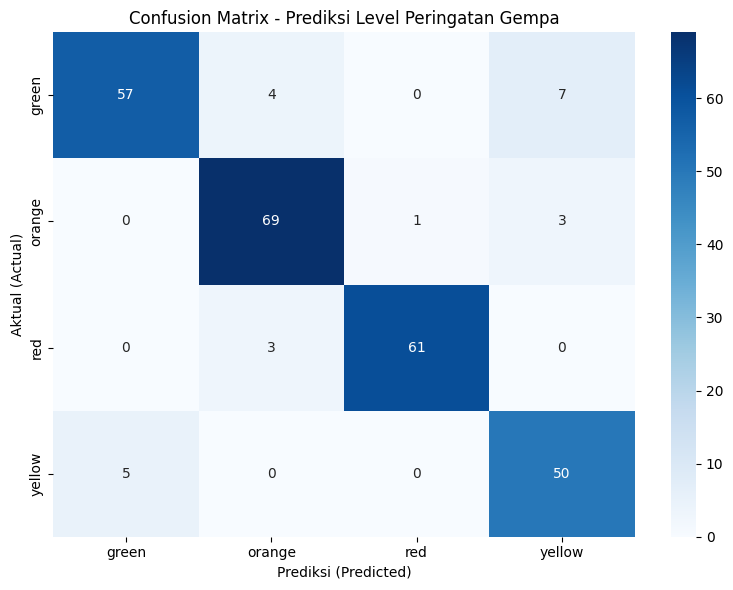

In [66]:
print("--- Memulai Proses CRISP-DM ---")

# --- 2. Data Understanding (Lanjutan) ---
print("\n--- Data Understanding ---")
print("Memeriksa distribusi kelas target (kolom 'alert'):")
print(df['alert'].value_counts())
class_names = sorted(df['alert'].unique())
print(f"Kelas yang akan diprediksi: {class_names}")

# --- Data Preparation ---
print("\n--- Data Preparation ---")

y = df['alert']
X = df.drop('alert', axis=1)

print(f"Fitur (X) yang digunakan: {X.columns.tolist()}")
print("Target (y) yang digunakan: 'alert'")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data dibagi: {len(X_train)} data latih (train), {len(X_test)} data tes (test).")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Fitur telah di-scaling (StandardScaler).")

# --- 4. Modeling ---
print("\n--- Modeling ---")

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("Model RandomForestClassifier telah dilatih (fit).")

# --- 5. Evaluation ---
print("\n--- Evaluation ---")

# Buat prediksi menggunakan data tes yang sudah di-scale
y_pred = model.predict(X_test_scaled)

# Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")

# Tampilkan Laporan Klasifikasi (precision, recall, f1-score)
print("\nLaporan Klasifikasi:")
print("classification_report(y_test, y_pred, labels=class_names)")

# Buat dan Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_names)

# Siapkan plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Prediksi Level Peringatan Gempa')
plt.ylabel('Aktual (Actual)')
plt.xlabel('Prediksi (Predicted)')
plt.tight_layout() # Merapikan layout